# EDA of 4 Bank Stocks (2006-2020)

This project deals with exploratory data analysis of the stock prices of four banks between 2006 (before the 2008 crisis) and the begining of 2020 (before the covid19 crisis). We'll focus on the stock prices of 4 banks and see how they progressed since 2006, how were their returns and which one was the riskiest asset. 

In [1]:
import os
av_api = os.environ.get('AV_API_KEY')

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

In [3]:
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# cufflinks
import plotly
import cufflinks as cf
cf.go_offline()

## Getting the data

We will use the Alpha Vintage API to get the data from the stocks of the four following banks:

- Bank of America (BAC)
- CitiGroup (C)
- Goldman Sachs (GS)
- JPMorgan Chase (JPM)

And we will store them in one data frame containing all the information. Then we will proceed to the exploratory data analysis.

In [4]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,1,1)

In [21]:
# Bank of America
BAC = data.DataReader("BAC", 'av-daily', start, end, api_key=av_api)
# CitiGroup
C = data.DataReader('C', 'av-daily', start, end, api_key=av_api)
# Goldman Sachs
GS = data.DataReader('GS', 'av-daily',start, end, api_key=av_api)
# JP Morgan Chase
JPM = data.DataReader('JPM', 'av-daily', start, end, api_key=av_api)

In [6]:
tickers = 'BAC C GS JPM'.split()

In [7]:
bank_stocks = pd.concat([BAC,C,GS,JPM], axis=1, keys=tickers)
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker                GS                                     JPM         \
Stock Info     volume    open    high     low   close   volume   open   high   
2006-01-03   15376000  126.70  129.44  124.23  128.87  6188700  39.83  40.36   
2006-01-04   18709000  127.35  128.91  126.38  127.09  4861600  39.78  40.14   
2006-01-05   11431000  126.00  127.32  125.61  127.04  3717400  39.61  39.81   
2006-01-06   13702000  127.29  129.25  127.29  128.84  4319600  39.92  40.24   
2006-01-09   16807000  128.50  130.62  128.00  130.39  4723500  39.88  40.72   

Bank Ticker                          
Stock Info     low  close    volume  
2006-01-03   39.30  40.19  12838600  
2006-01-04   39.42  39.62  13491500  
2006-01-05   39.50  39.74   8109400  
2006-01-06   39.55  40.02   7966900  
2006-01-09   39.88  40.67  16575200

## Exploratory Data Analysis and cleaning

In this section we go through the actual EDA of the stocks of the four banks. First, we calculate the daily stock returns for each of the banks and we plot them to one another. In the generated pairplot, however, we find that the Citigroup returns are disturbed by one very large return. We then clean the data corresponding to that error. 

Afterwards, we proceed to calculate the best and worst days for each bank's stock. The worst day fr 3 out of 4 of them was the inauguration day of Barack Obama. Finally, we plot the stock price evolution and the correlation of these 4 stocks.

In [8]:
# getting the daily returns for each bank stock
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183
2006-01-05,0.001288,0.004961,-0.000393,0.003029
2006-01-06,-0.001501,0.000000,0.014169,0.007046
2006-01-09,0.000644,-0.004731,0.012030,0.016242


<Figure size 864x864 with 0 Axes>

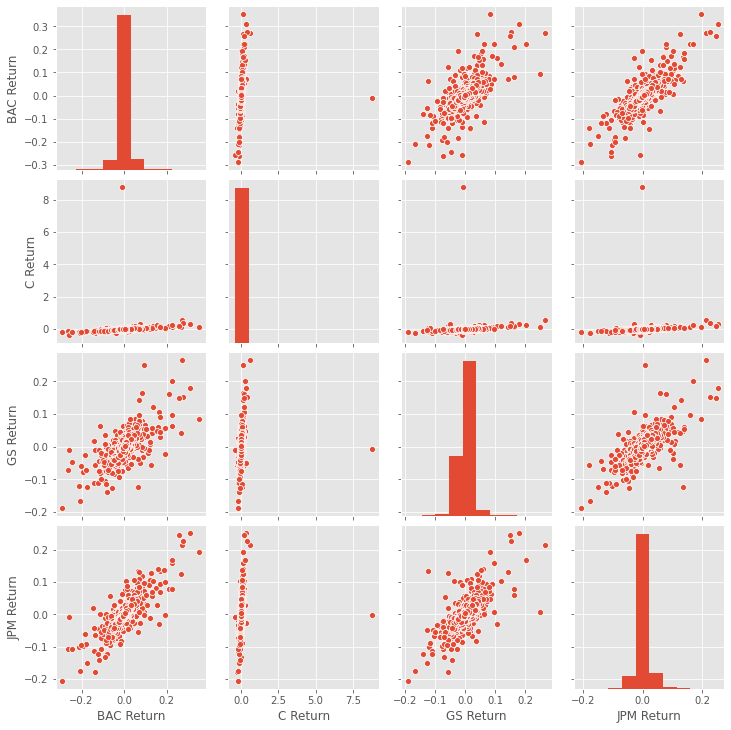

In [9]:
# plotting the returns against each other
plt.style.use('ggplot')
plt.figure(figsize=(12,12))
sns.pairplot(data=returns)

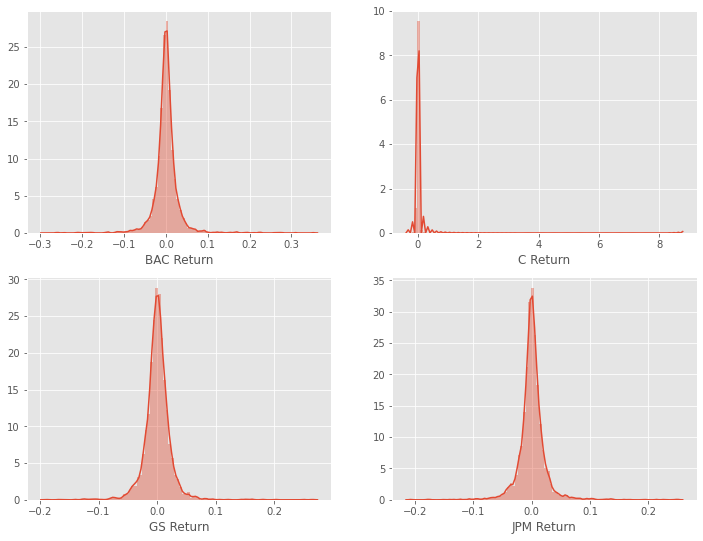

In [10]:
# distribution for the returns of each of the stocks
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
sns.distplot(returns['BAC Return'], bins=100)
plt.subplot(2,2,2)
sns.distplot(returns['C Return'], bins=100)
plt.subplot(2,2,3)
sns.distplot(returns['GS Return'], bins=100)
plt.subplot(2,2,4)
sns.distplot(returns['JPM Return'], bins=100)

### Correcting some errors

There seems to be one very high return on the C stock on one particular day. What can this mean? When did this happen? We should run the following code to find it. What we find is indeed a date when the return for the stock was extremely high. On May 9th 2011, the Citigroup stock had a return of 876.99%. 

After looking online for information on this day, we can find that on that day Citigroup had a [reverse stock split](https://www.citigroup.com/citi/news/2011/110321a.htm). In order to properly study the data, we need to correct this artificial return that is not a result of actual equity earnings. To do that, we set the return on that day to the mean of its daily stock returns and re-run the previous plots. Now the plots look cleaner and the C stock value behaviour looks more similar to that of the other 3 banks.

In [11]:
returns['C Return'].loc['2011-05-09'] = returns['C Return'].mean()

In [12]:
returns['C Return'].loc['2011-05-09']

0.002542786350980463

<Figure size 864x864 with 0 Axes>

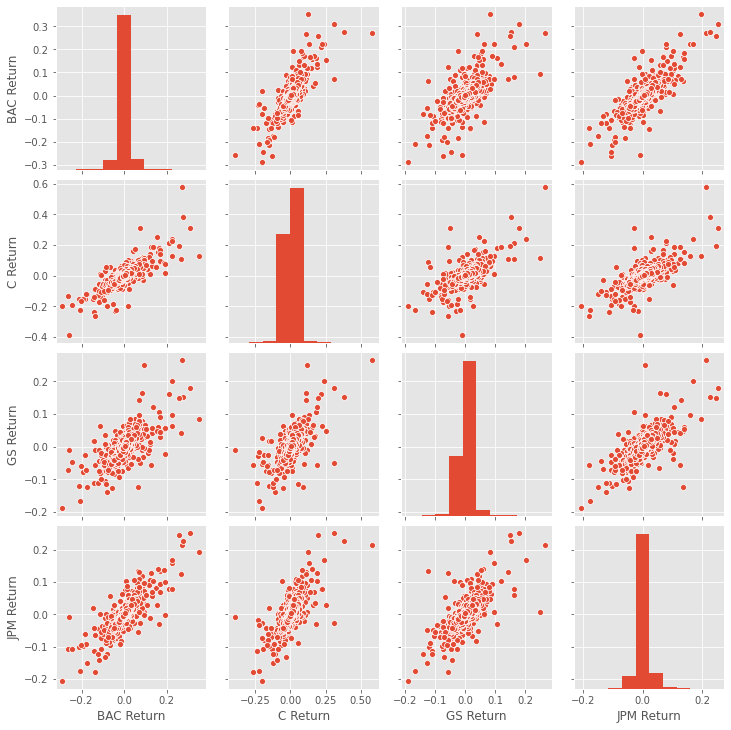

In [13]:
plt.figure(figsize=(12,12))
sns.pairplot(data=returns)

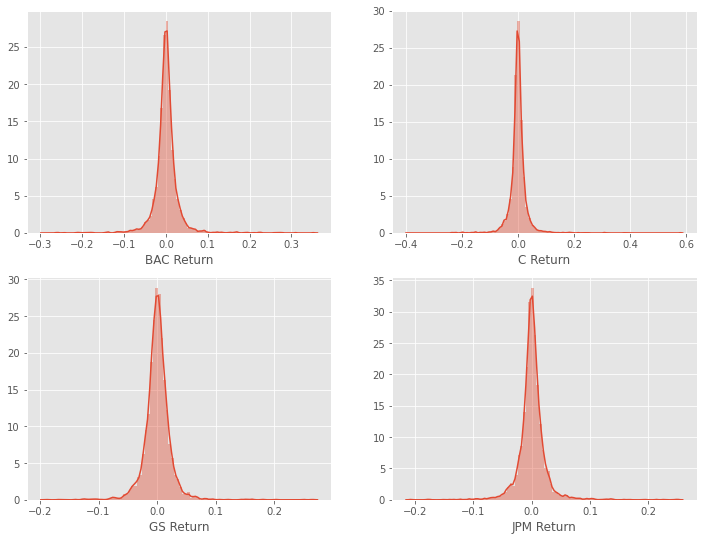

In [14]:
# distribution for the returns of each of the stocks
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
sns.distplot(returns['BAC Return'], bins=100)
plt.subplot(2,2,2)
sns.distplot(returns['C Return'], bins=100)
plt.subplot(2,2,3)
sns.distplot(returns['GS Return'], bins=100)
plt.subplot(2,2,4)
sns.distplot(returns['JPM Return'], bins=100)

### Finding the best and worst daily returns for each stock

The worst day of the period for 3 of the 4 stocks is January 20th, 2009. This was Obama's inauguration day. It was the worst day for bank stocks in years. Their value was down to previous November lows in just one day.

In [15]:
# dates for the worst days of each stock
returns.idxmin()

BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
dtype: object

In [16]:
# dates for the best days of each stock (more spread out)
returns.idxmax()

BAC Return    2009-04-09
C Return      2008-11-24
GS Return     2008-11-24
JPM Return    2009-01-21
dtype: object

In [17]:
# risk for each of the stocks
returns.std()  # C is the riskiest

BAC Return    0.032143
C Return      0.033740
GS Return     0.022921
JPM Return    0.024387
dtype: float64

### Stock price evolution

Here is the evolution of the value of each stock in the period that we are studying. The first graph is an exportable image. The second one is an interactive plot, you can zoom in by selecting a portion of the plot.

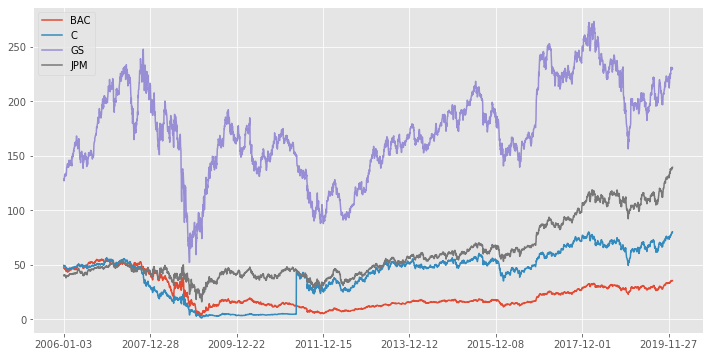

In [18]:
plt.figure(figsize=(12,6))
for tick in tickers:
    bank_stocks[tick]['close'].plot(label=tick)
plt.legend()

In [19]:
# This code requires the cufflinks library. Remember to import it before running it.
bank_stocks.xs(key='close', axis=1, level='Stock Info').iplot()

### Correlation among stocks

In this section, we created a heatmap of the correlation of the stock values for each stock. Of course, since the stocks in question are all form banks in America, their values are somewhat correlated. However, the degree of correlation varies among them. We can see in the following figure that, of these 4, the most correlated pair of stocks is Citigroup and JP Morgan, with a 0.78 correlation between 2006 and 2020. The least correlated pair stocks of these ones is Bank of America and JP Morgan, with a correlation of 0.21.

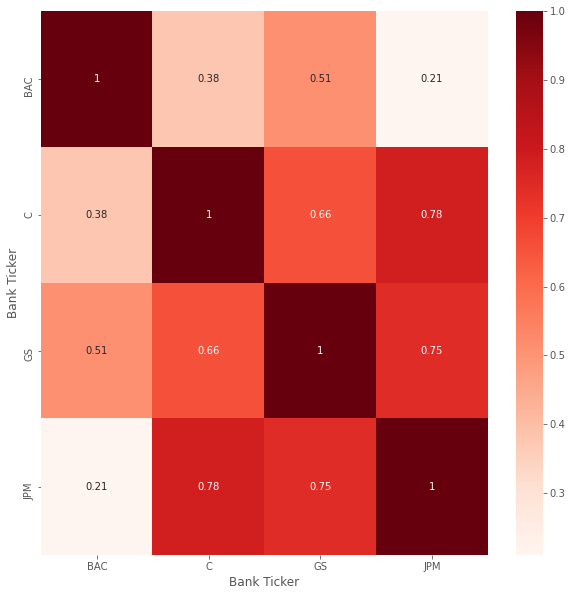

In [20]:
banks_corr = bank_stocks.xs(key='close', axis=1, level='Stock Info').corr()
plt.figure(figsize=(10,10))
sns.heatmap(banks_corr, annot=True, cmap='Reds')

## Conclusion

In this EDA study we analysed the value and returns of 4 bank stocks. Analysis like this one could be of use to portfolio mangers and to indidivual investors. Since the information and the plots displayed at this study come from real historical data, they could be useful when creating an investment porfolio. The first part of the EDA allows the reader to familiarise herself to the assets in question while the last part shows the historical correlation of the assets in the previous 14 years. Coupled with a solid knowledge of equity management, these techniques could be used to make well-informed investment decisions. 

However, it is crucial to mention that this information is not to be considered professional financial advice and should be interpreted by a financial professional before making any investment decisions. This is only a partial analysis of these assets and was thought for educational purposes only.